In [1]:
import nltk
import numpy as np
import pandas as pd
import time

import pickle
from os import path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys
sys.path.append('./utils')
import my_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib
from sklearn.svm import SVC
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression

In [2]:
subdir = './datasets/twitter/'
files = ['bank_train.csv', 'bank_test.csv', 'bank_test_etalon.csv', 'ttk_train.csv', 'ttk_test.csv', 'ttk_test_etalon.csv']
files = [path.join(subdir, x) for x in files]
df_dict = {}

In [21]:
for i in files:
    df_dict[i] = pd.read_csv(i, index_col=0)

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
#we can add stop words

import pymorphy2
def tokenize(text):
    text = text.lower()
    text_list = nltk.word_tokenize(text)
    morph = pymorphy2.MorphAnalyzer()
    text_list = [word for word in text_list if word[0] != '@' and len(word) > 1 and word.isalpha()]
    text_list = [morph.parse(word)[0].normal_form for word in text_list]
    text_list = [x for x in text_list if x not in stop_words ]
    return text_list

In [15]:
tokens = {}
for k, v in df_dict.items():
    l = [tokenize(x) for x in v['text']]
    tokens[k] = l

In [16]:
import pickle
with open('tokens_stat.pcl', 'wb') as fout:
    pickle.dump(tokens, fout)

In [23]:
for k, v in tokens.items():
    print ('~~~~~~~~`')
    print (path.basename(k))
    len_list = np.array([len(x) for x in v if len(x) > 0])
    print ('min: {}'.format(np.min(len_list)))
    print ('mean: {}'.format(np.mean(len_list)))
    print ('max: {}'.format(np.max(len_list)))

~~~~~~~~`
bank_train.csv
min: 1
mean: 7.5438
max: 24
~~~~~~~~`
ttk_test.csv
min: 1
mean: 7.682871678914641
max: 23
~~~~~~~~`
ttk_test_etalon.csv
min: 1
mean: 7.65953561179233
max: 19
~~~~~~~~`
bank_test_etalon.csv
min: 1
mean: 6.900835532102023
max: 20
~~~~~~~~`
ttk_train.csv
min: 1
mean: 7.947758206565252
max: 24
~~~~~~~~`
bank_test.csv
min: 1
mean: 6.972400756143667
max: 20


In [24]:
for k, v in tokens.items():
    print ('~~~~~~~~`')
    print (path.basename(k))
    len_list = np.array([len(x) for x in v])
    unique, count = np.unique(len_list, return_counts=True)
    for i,j in zip(unique, count):
        print ('{}: {}'.format(i, j))

~~~~~~~~`
bank_train.csv
1: 3
2: 12
3: 49
4: 468
5: 1190
6: 903
7: 513
8: 350
9: 272
10: 255
11: 207
12: 210
13: 182
14: 167
15: 137
16: 59
17: 13
18: 3
19: 3
20: 3
24: 1
~~~~~~~~`
ttk_test.csv
0: 15
1: 64
2: 183
3: 327
4: 427
5: 587
6: 584
7: 572
8: 495
9: 467
10: 401
11: 382
12: 292
13: 255
14: 150
15: 63
16: 35
17: 14
18: 4
19: 3
22: 1
23: 1
~~~~~~~~`
ttk_test_etalon.csv
0: 12
1: 45
2: 108
3: 221
4: 325
5: 448
6: 413
7: 415
8: 360
9: 354
10: 306
11: 285
12: 214
13: 163
14: 110
15: 40
16: 20
17: 5
19: 1
~~~~~~~~`
bank_test_etalon.csv
0: 1
1: 14
2: 42
3: 175
4: 733
5: 927
6: 641
7: 452
8: 376
9: 309
10: 234
11: 196
12: 173
13: 145
14: 71
15: 30
16: 22
17: 4
18: 2
19: 1
20: 1
~~~~~~~~`
ttk_train.csv
0: 4
1: 35
2: 105
3: 252
4: 462
5: 591
6: 583
7: 509
8: 457
9: 374
10: 348
11: 356
12: 334
13: 240
14: 164
15: 93
16: 42
17: 24
18: 11
19: 4
20: 6
21: 4
23: 1
24: 1
~~~~~~~~`
bank_test.csv
0: 6
1: 27
2: 67
3: 229
4: 798
5: 1005
6: 710
7: 546
8: 443
9: 383
10: 300
11: 250
12: 201
13: 172
14:

In [23]:
with open('tokens_stat.pcl', 'rb') as fin:
    tokens = pickle.load(fin)

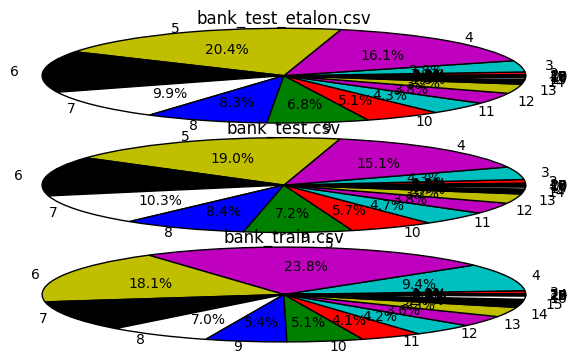

In [17]:

fig, axises = plt.subplots(3,1)
i = 0
for k, v in tokens.items():
    if k in files[:3]:
        axis_name = path.basename(k)
        axis = axises[i]
        len_list = np.array([len(x) for x in v])
        unique, count = np.unique(len_list, return_counts=True)
        axis.pie(count, labels=unique, radius=1.3, autopct='%1.1f%%')
        axis.set_title(axis_name)
        i += 1
plt.show()

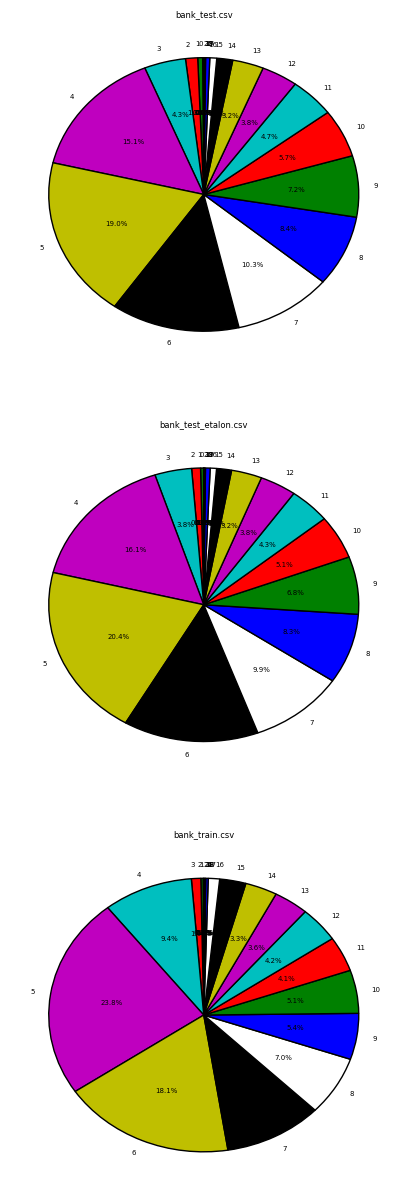

In [35]:
import matplotlib
fig = plt.figure(figsize=(5, 15))
 #fig = plt.figure(figzise = (10, 10))
i = 1
matplotlib.rcParams.update({'font.size': 5})
for k, v in tokens.items():
    if k in files[:3]:
        axis_name = path.basename(k)
        axis = fig.add_subplot(3,1,i)
        len_list = np.array([len(x) for x in v])
        unique, count = np.unique(len_list, return_counts=True)
        axis.pie(count, labels=unique, autopct='%1.1f%%',startangle=90)
        axis.set_title(axis_name)
        i += 1
plt.show()

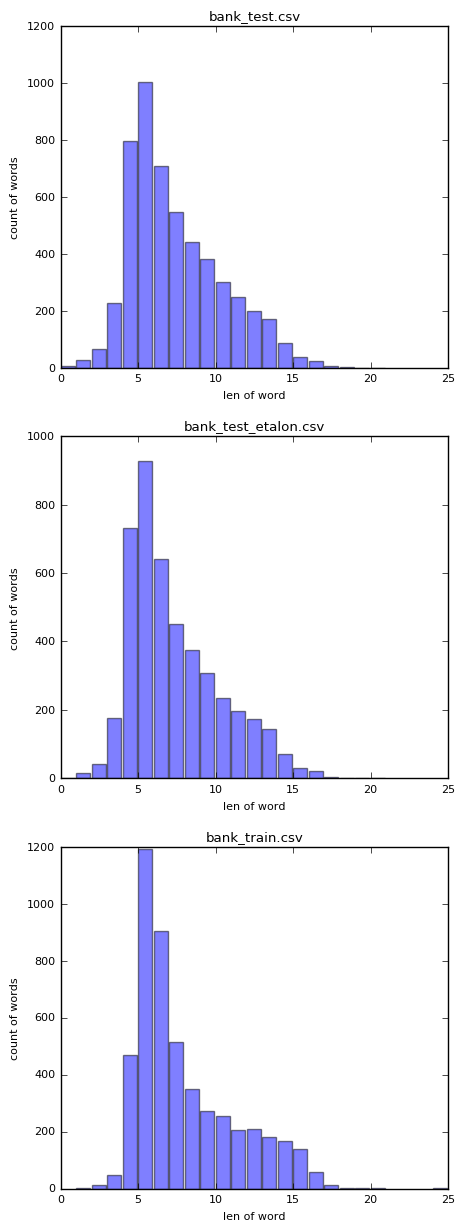

In [36]:

fig = plt.figure(figsize=(5, 15))
i = 1
matplotlib.rcParams.update({'font.size': 8})
for k, v in tokens.items():
    if k in files[:3]:
        axis_name = path.basename(k)
        axis = fig.add_subplot(3,1,i)
        len_list = np.array([len(x) for x in v])
        unique, count = np.unique(len_list, return_counts=True)
        plt.bar(unique, count, width=0.9, color='b', alpha=0.5)
        axis.set_title(axis_name)
        axis.set_ylabel('count of words')
        axis.set_xlabel('len of word')
        i += 1
plt.show()

In [33]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
def plot_embedding(X, y, save=False, filename='fig1', font_size=15):
    matplotlib.rcParams.update({'font.size': font_size})
    #X = np.random.rand(1000, 100)
    #y = np.random.random_integers(-1,1,1000)
    pca = PCA(n_components=2)
    #X = preprocessing.normalize(X, norm='l2')
    X_r = pca.fit(X).transform(X)
    target_names = ['Bad', 'Neutral', 'Good']
    colors = ['navy', 'turquoise', 'darkorange']

    plt.figure(figsize=(20,20))
    lw = 2

    for color, i, target_name in zip(colors, [-1, 0, 1], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=3, fontsize=font_size)
    plt.title('PCA', fontsize=font_size)
    if save:
        plt.savefig(filename+'pca'+'.png')
    from sklearn.manifold import TSNE
    model = TSNE(n_components=2, random_state=0)
    X_r2 = model.fit_transform(X)
    plt.figure(figsize=(20,20))
    plt.title('t-SNE', fontsize=font_size)
    for color, i, target_name in zip(colors, [-1, 0, 1], target_names):
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=3,fontsize=font_size)
    if save:
        plt.savefig(filename+'tsne'+'.png')
    plt.show()

In [85]:
companies = ['alfabank', 'gazprom', 'raiffeisen', 'rshb', 'sberbank', 'uralsib', 'vtb']
companies2 = ['beeline', 'date', 'komstar', 'megafon', 'mts', 'rostelecom', 'skylink','tele2']
df_dict[files[5]].columns

Index(['beeline', 'date', 'komstar', 'megafon', 'mts', 'rostelecom', 'skylink',
       'tele2', 'text', 'twitid'],
      dtype='object')

In [160]:
df = df_dict[files[0]]

In [168]:
def get_norm_dataframe(df, companies):
    new_df = {}
    texts = []
    labels = []
    strange_facts = []
    for i in range(len(df)):
        ranks = []
        for companie in companies:
            try:
                label = df[companie][i]
                if label == '0' or label == '-1' or label == '1' or label == 0.0 or label == -1.0 or label == 1.0:
                    ranks.append(int(label))
            except Exception:
                continue
        ranks = np.array(ranks)
        text = df['text'][i]
        if len(ranks) == 0:
            texts.append(text)
            labels.append(None)
            strange_facts.append('label is None')
            continue
        strange_fact = None
        if len(ranks) > 1:
            strange_fact = 'a few labels'
        label = np.bincount(ranks + 1).argmax() - 1
        texts.append(text)
        labels.append(label)
        strange_facts.append(strange_fact)
    new_df = {'text': pd.Series(texts), 'label': pd.Series(labels), 'strang_fact': pd.Series(strange_facts)}
    new_df = pd.DataFrame(new_df)
    return new_df

In [186]:
subdir = './datasets/twitter/'
for file in files[3:]:
    old_df = df_dict[file]
    old_df.index = range(len(old_df))
    df = get_norm_dataframe(old_df, companies2)
    name = 'short_' + path.basename(file)
    df.to_csv(path.join(subdir, name))

In [13]:
train_df = pd.read_csv('./datasets/twitter/short_ttk_train.csv')
test_df = pd.read_csv('./datasets/twitter/short_ttk_test_etalon.csv')

In [4]:
len(test_df[test_df['label'] == 1])

344

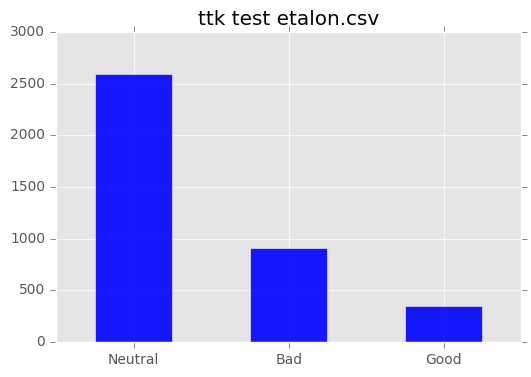

In [5]:
%matplotlib inline
matplotlib.style.use('ggplot')
number2word = {0:'Neutral', -1:'Bad', 1:'Good'}
test_df.label.apply(lambda x: number2word.get(x, 'NaN')).value_counts().plot(kind="bar", color = 'b', alpha = 0.9, rot=0, title='ttk test etalon.csv' )

In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
#we can add stop words

import pymorphy2
def tokenize(text):
    text = text.lower()
    text_list = nltk.word_tokenize(text)
    morph = pymorphy2.MorphAnalyzer()
    text_list = [word for word in text_list if word[0] != '@' and len(word) > 1 and word.isalpha()]
    text_list = [morph.parse(word)[0].normal_form for word in text_list]
    return text_list

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
%%time
# training
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=tokenize,
    preprocessor=None, stop_words=stop_words, max_features=2000) 
train_data_features = count_vectorizer.fit_transform(train_df['text'])

CPU times: user 5min 23s, sys: 19.6 s, total: 5min 43s
Wall time: 5min 43s


In [9]:
%%time
X_train = count_vectorizer.transform(train_df['text'])
X_test = count_vectorizer.transform(test_df['text'])

NameError: name 'count_vectorizer' is not defined

In [17]:
%%time
y_train = train_df['label']
y_test = test_df['label']

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 10.9 ms


In [18]:
true_l = np.array(y_train.notnull())
y_train = y_train[true_l].apply(lambda x: int(x))
X_train = X_train.toarray()[true_l, :]
true_l = np.array(y_test.notnull())
y_test = y_test[true_l].apply(lambda x: int(x))
X_test = X_test.toarray()[true_l, :]

In [67]:
#small train data
max_n = min([y_train.value_counts().get(1), y_train.value_counts().get(-1), y_train.value_counts().get(0)])
X_bad = shuffle(X_train[np.array(y_train == -1),:])[:max_n]
X_neutral = shuffle(X_train[np.array(y_train == 0),:])[:max_n]
X_good = shuffle(X_train[np.array(y_train == 1),:])[:max_n]
X_train = np.append(X_bad, X_neutral, axis=0)
y_train = np.append(np.full(max_n, -1, dtype=int), np.full(max_n, 0, dtype=int))
X_train = np.append(X_train, X_good, axis=0)
y_train = np.append(y_train, np.full(max_n, 1, dtype=int))

In [70]:
X_train, y_train = shuffle(X_train, y_train)

/home/parkin/.local/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/parkin/.local/lib/python3.5/site-packages/ipykernel/__main__.py:25: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


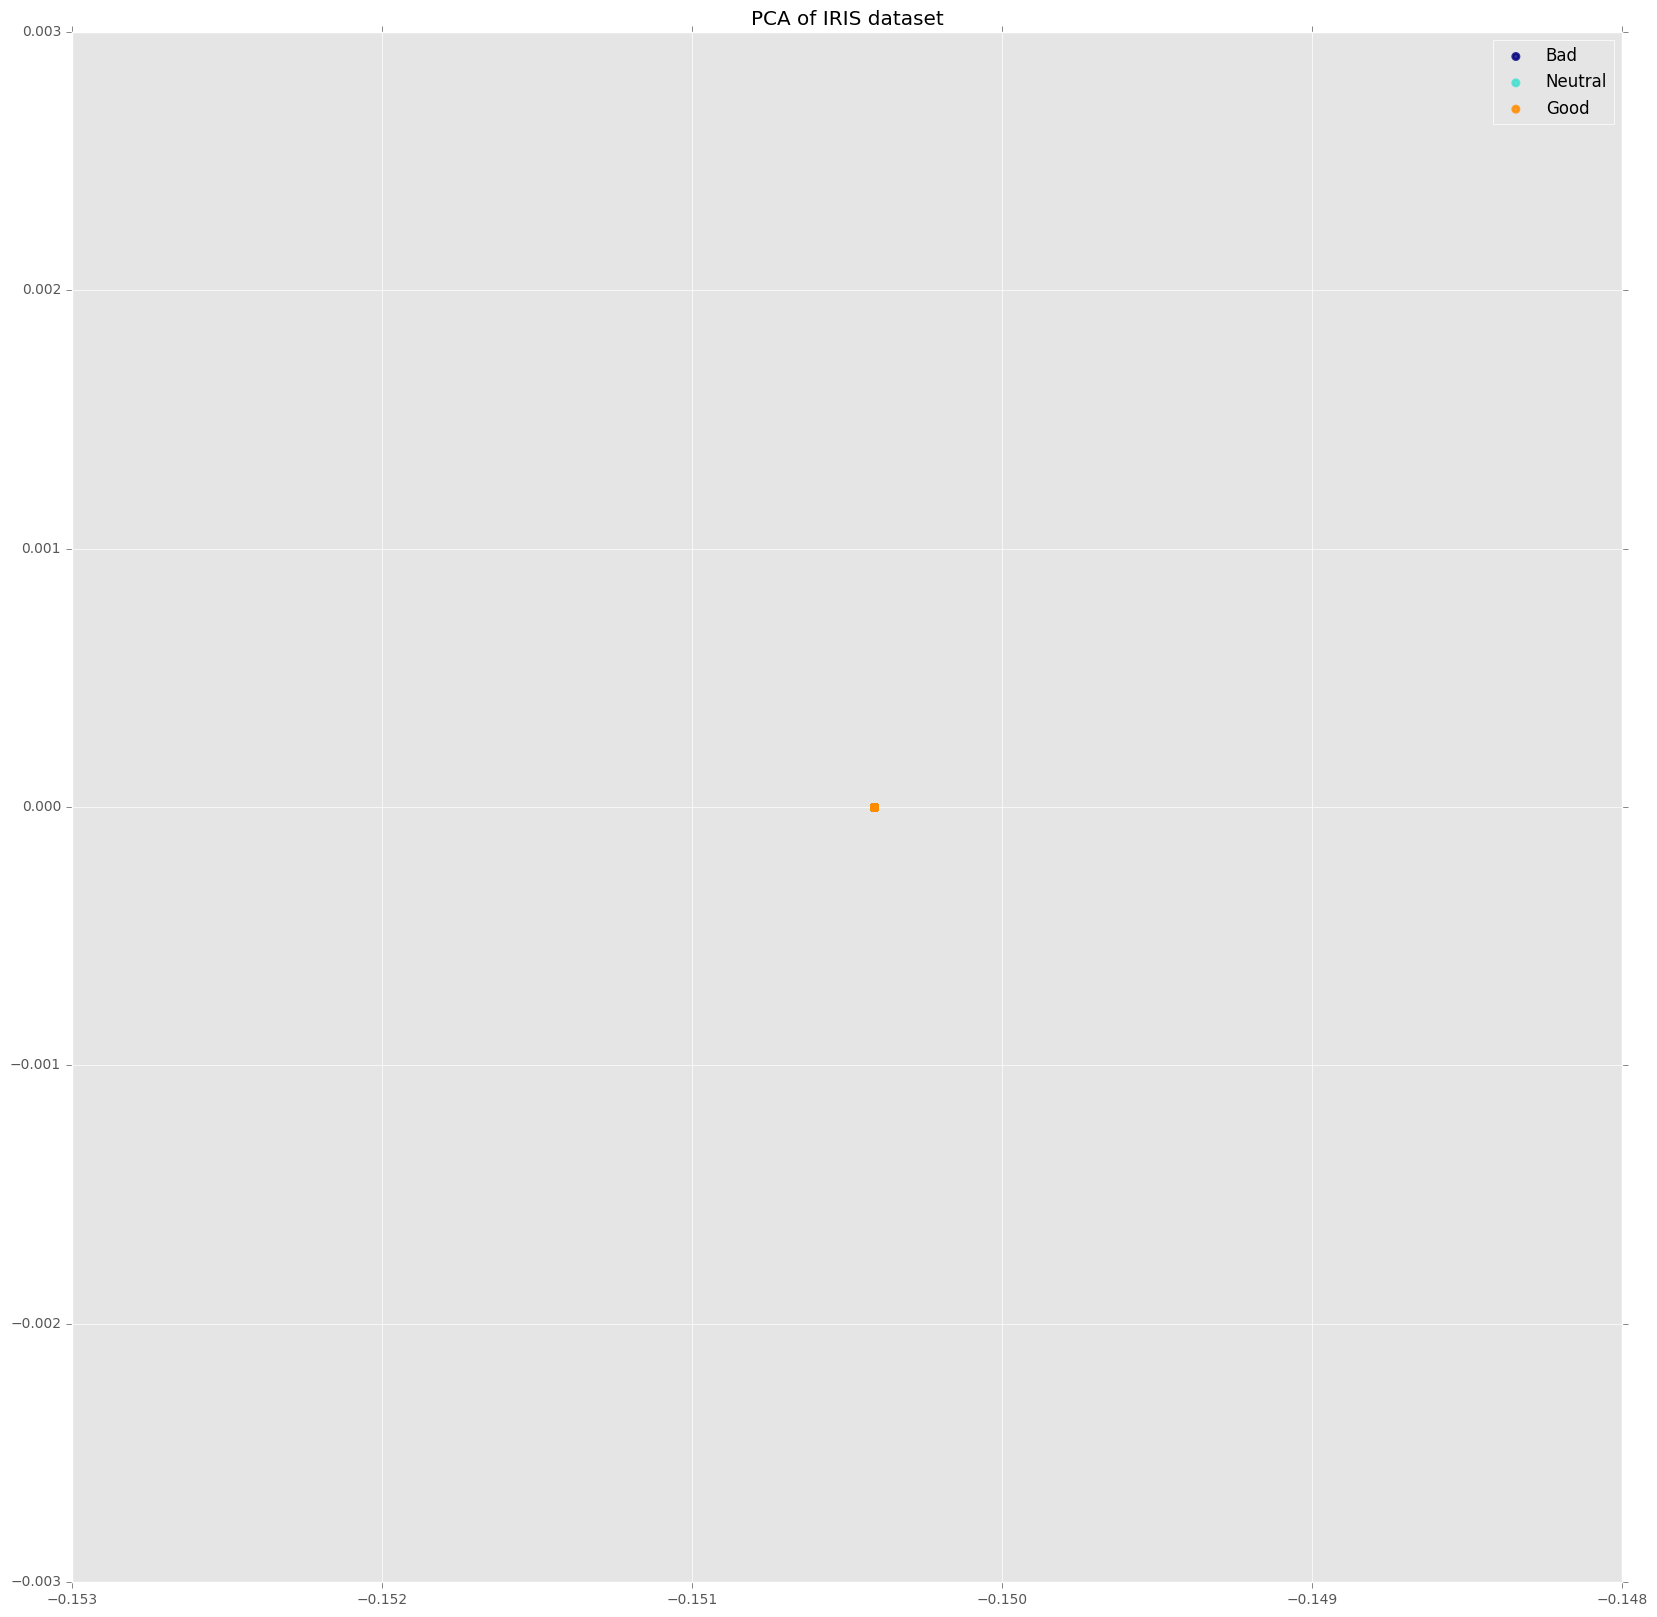

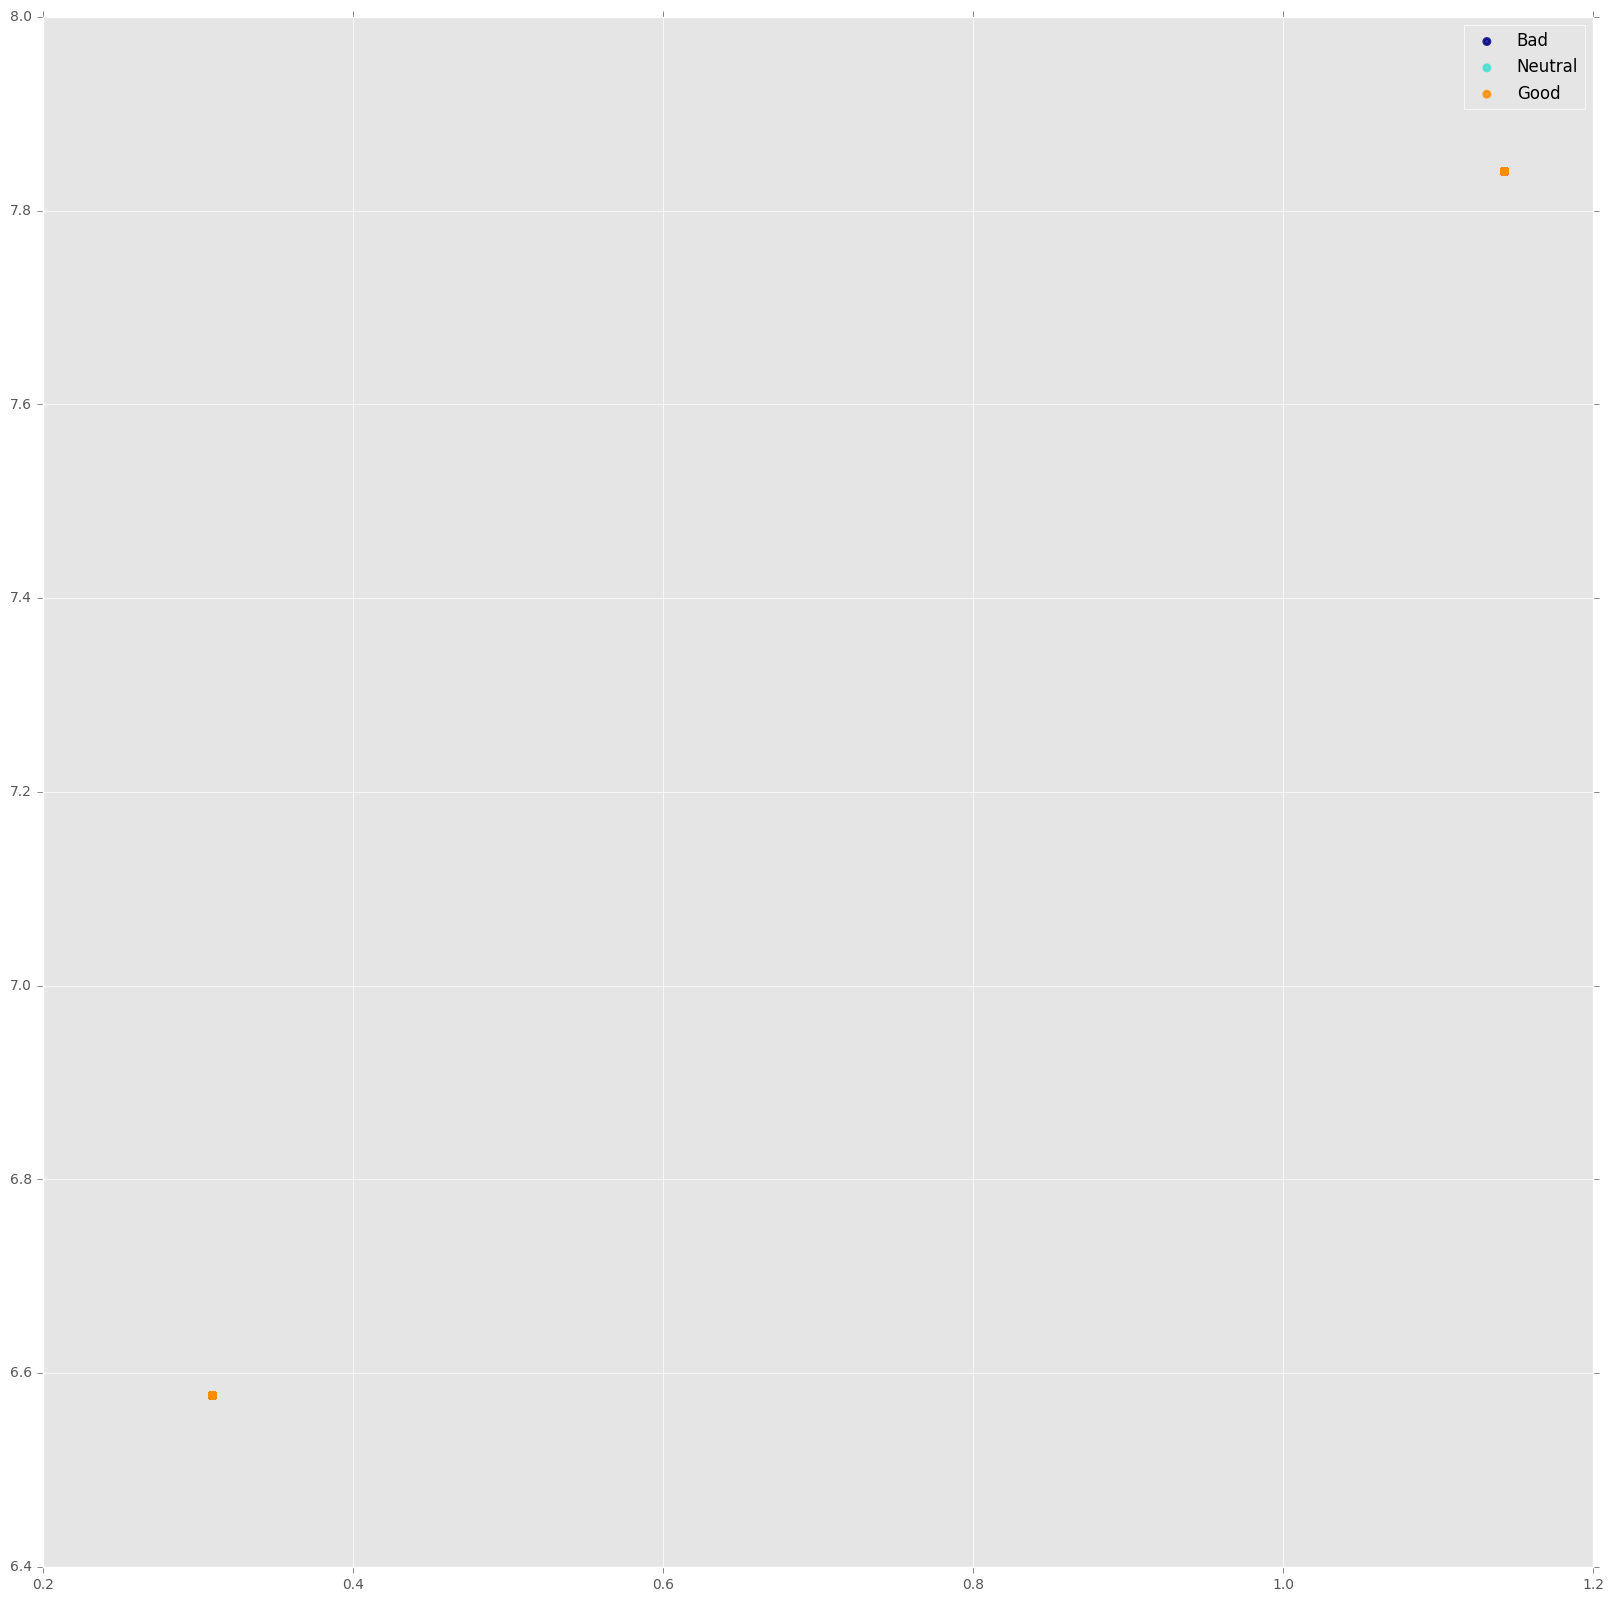

CPU times: user 3min 5s, sys: 12.9 s, total: 3min 18s
Wall time: 3min 27s


In [62]:
%%time
plot_embedding(X_train, y_train)

In [85]:
#X = X.T[:300].T.shape
X_train = X_train[true_l, :]

/home/parkin/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5000 but corresponding boolean dimension is 4799
  from ipykernel import kernelapp as app


In [71]:
print (X_train.shape[0] == y_train.shape[0])
print (X_test.shape[0] == y_test.shape[0])

True
True


In [72]:
%%time
model = SVC()
model.fit(X_train, y_train, )
y_predict = model.predict(X_test)

CPU times: user 1min 16s, sys: 276 ms, total: 1min 16s
Wall time: 1min 20s


In [73]:
y_predict.shape

(3845,)

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
print(plt.style.available)

['grayscale', 'fivethirtyeight', 'seaborn-pastel', 'seaborn-talk', 'seaborn-bright', 'seaborn-notebook', 'ggplot', 'seaborn-darkgrid', 'dark_background', 'seaborn-poster', 'classic', 'seaborn-ticks', 'seaborn-dark-palette', 'seaborn-paper', 'seaborn-dark', 'bmh', 'seaborn-whitegrid', 'seaborn-colorblind', 'seaborn-white', 'seaborn-muted', 'seaborn-deep']


In [8]:
%matplotlib inline
import itertools
plt.style.use('seaborn-notebook')
#y_test = np.array([-1,-1,1,1,0,0,0,1,-1,0])
#y_pred = np.array([-1,-1,1,0,0,0,0,1,-1,0])
cnf_matrix = confusion_matrix(y_test, y_predict)
class_names = ['Bad', 'Neutral', 'Good']
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, count vectorize')
plt.show()

NameError: name 'y_test' is not defined

In [76]:
print ('f_score: {:.4f}'.format(my_score.f_macro(my_score.cound_diff(y_predict, y_test))))
print ('precision: {:.4f}'.format(precision_score(y_pred=y_predict, y_true=y_test, average='macro')))
print ('recall: {:.4f}'.format(recall_score(y_pred=y_predict, y_true=y_test, average='macro')))

f_score: 0.4361
precision: 0.5059
recall: 0.4157


In [10]:
#word2vec
import gensim
import pickle
model = gensim.models.Word2Vec.load('./datasets/word2vec_normalize.model')

/usr/local/lib/python3.5/dist-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [11]:
def avg_feature_vector(words, model):
        #function to average all words vectors in a given paragraph
        num_features = model.vector_size
        featureVec = np.zeros((num_features,), dtype="float32")
        nwords = 0

        #list containing names of words in the vocabulary
        index2word_set =list(model.vocab.keys())
        for word in words:
            if word in index2word_set:
                nwords = nwords+1
                featureVec = np.add(featureVec, model[word])

        if(nwords>0):
            featureVec = np.divide(featureVec, nwords)
        return featureVec

In [12]:
def transform_df(df, model):
    X = np.zeros((len(df), model.vector_size))
    for idx, x in enumerate(df['text']):
        X[idx,:] = avg_feature_vector(tokenize(x), model)
    
    return X

In [14]:
X = transform_df(train_df, model)

In [15]:
X_train = X
y_train = train_df['label']

In [16]:
true_l = np.array(y_train.notnull())
y_train = y_train[true_l].apply(lambda x: int(x))
X_train = X_train[true_l, :]

In [17]:
X_test = transform_df(test_df, model)
y_test = test_df['label']

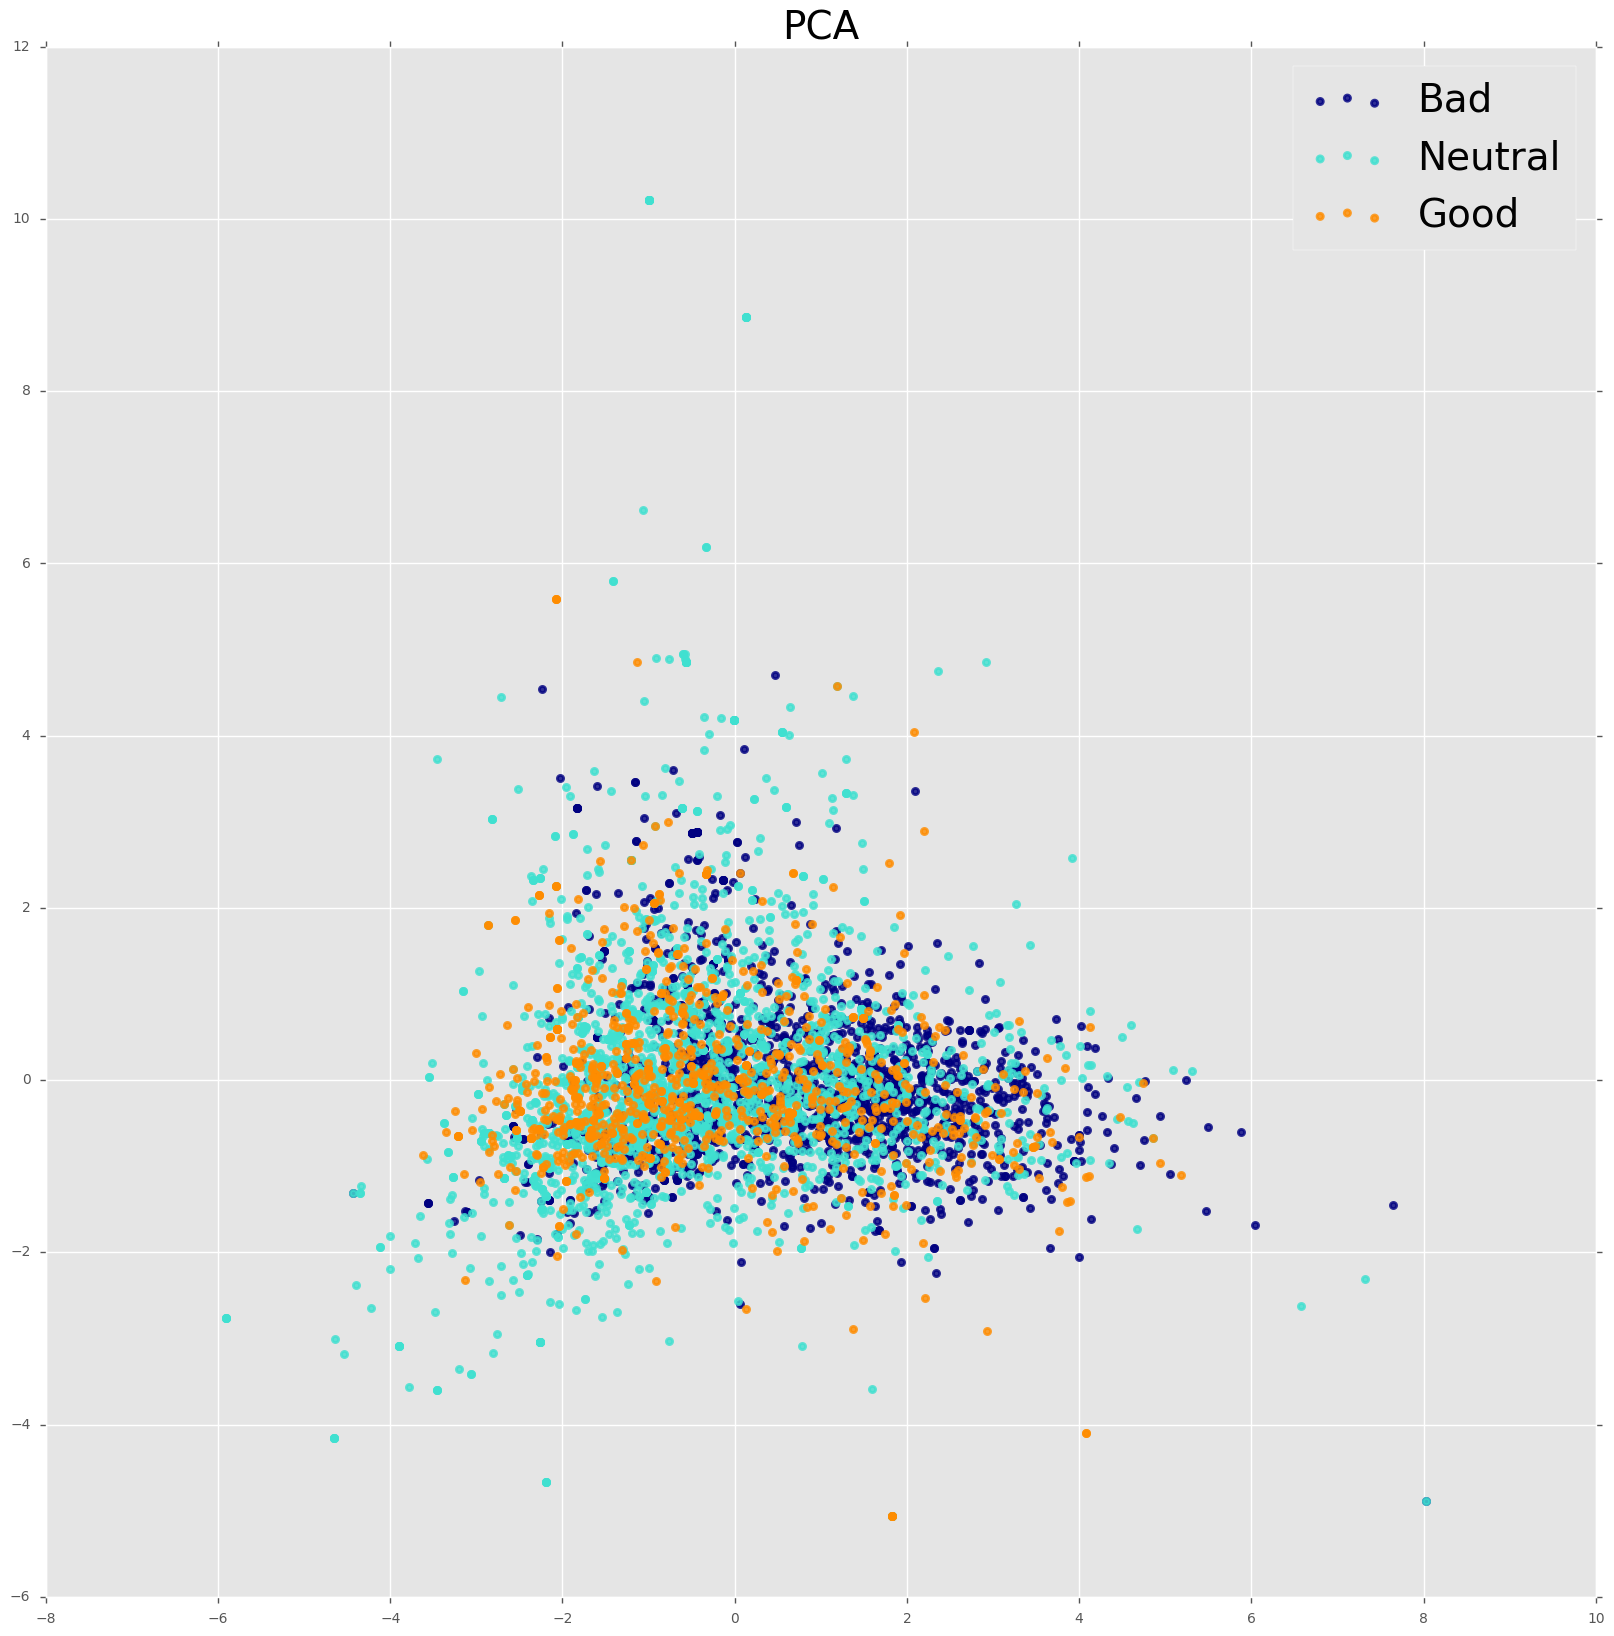

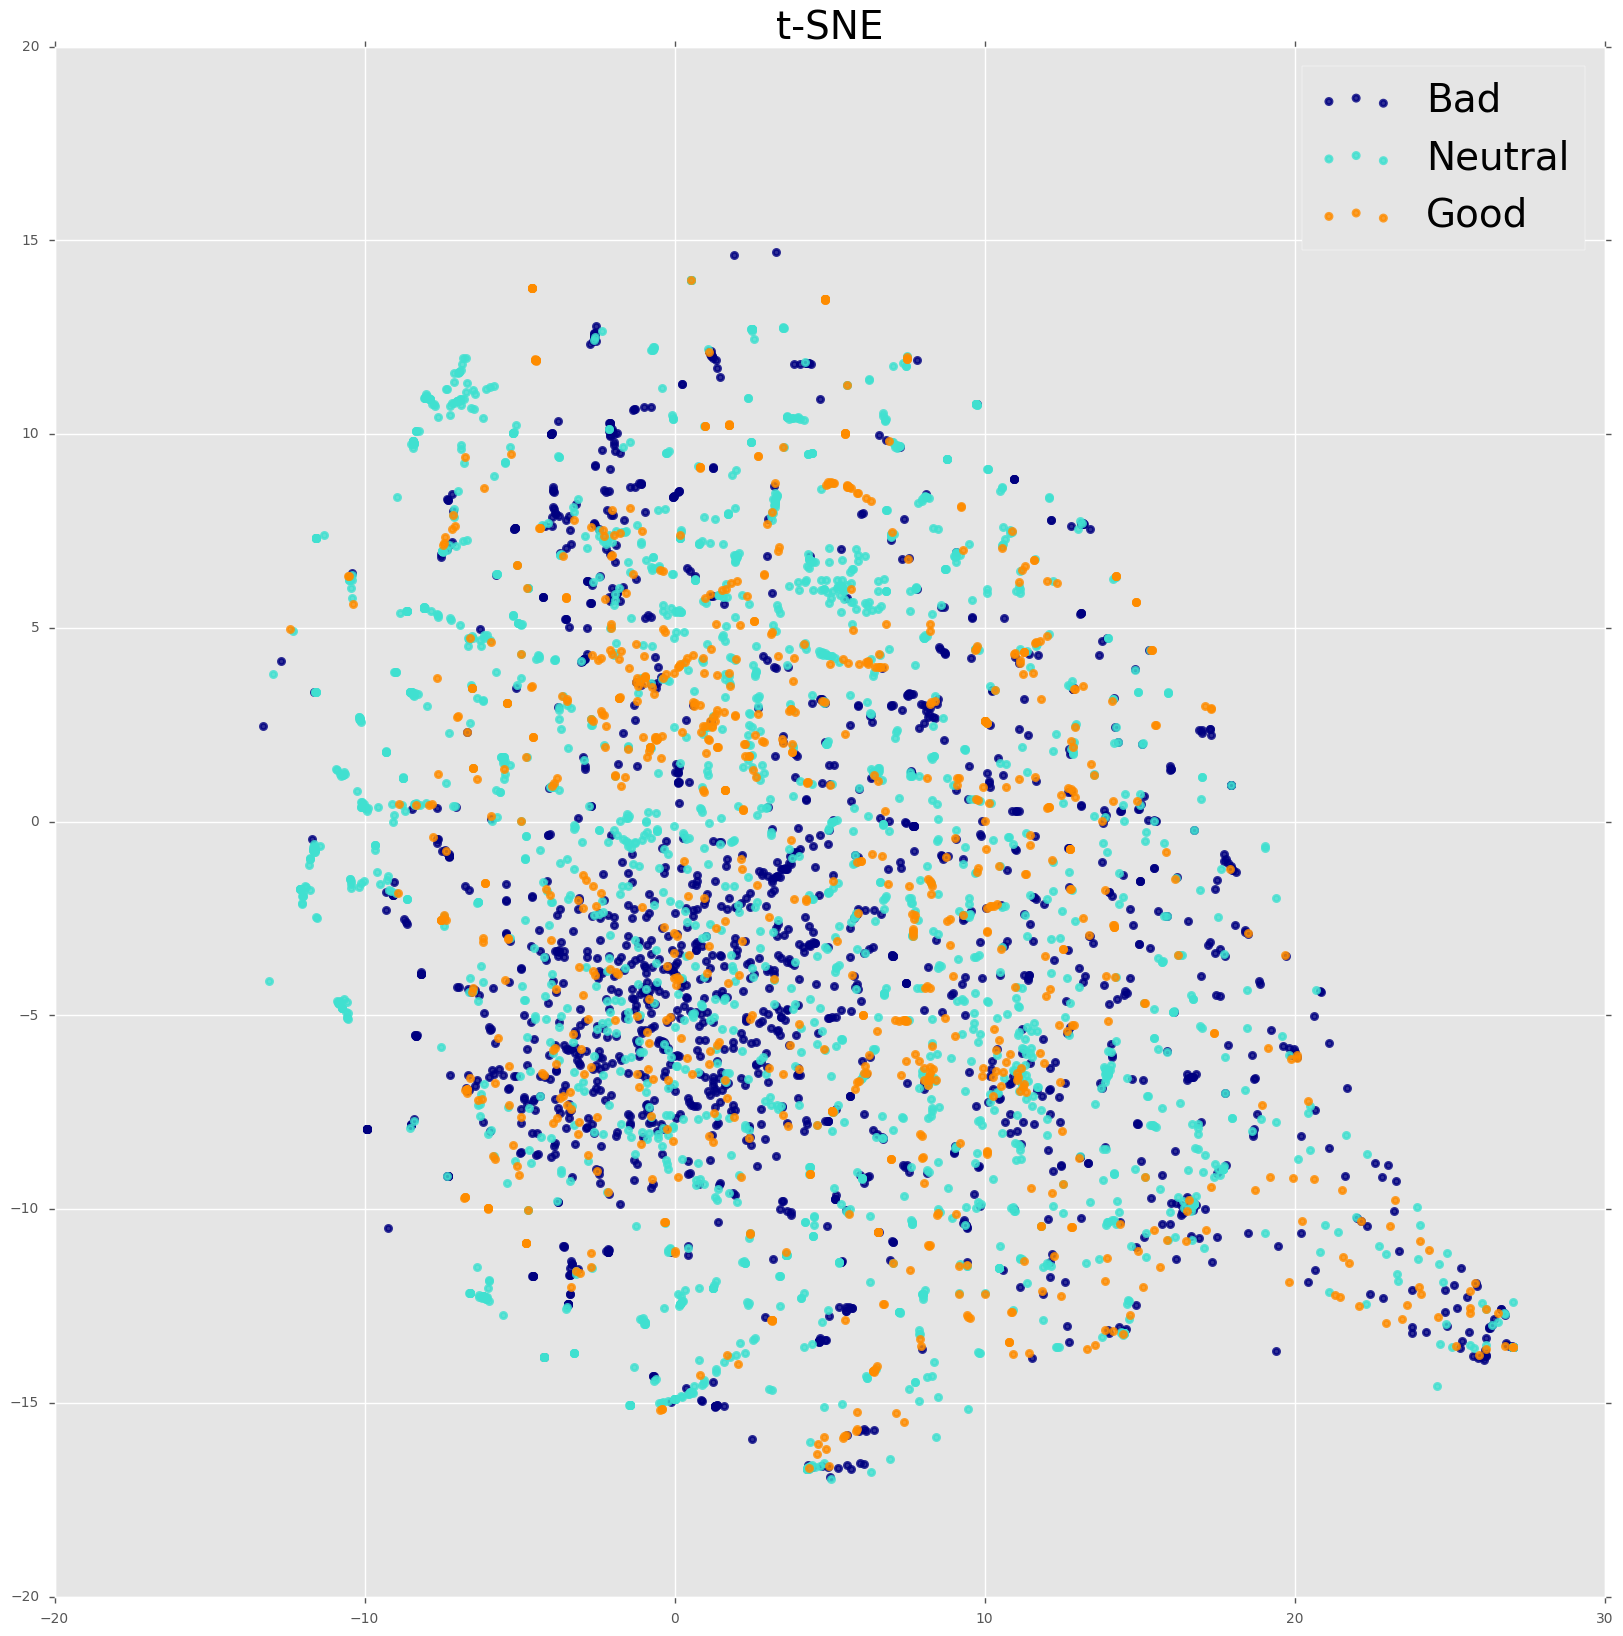

CPU times: user 1min 29s, sys: 7.94 s, total: 1min 37s
Wall time: 1min 40s


In [34]:
%%time
res = plot_embedding(X_train, np.array(y_train), save=True, font_size=28)

In [35]:
%%time
model = LogisticRegression()
model.fit(X_train,np.array(y_train))
y_predict = model.predict(X_test)
'''model = SVC(C=0.2)
model.fit(X_train, np.array(y_train))
y_predict = model.predict(X_test)
y_test = np.array(y_test)'''

CPU times: user 1.22 s, sys: 4 ms, total: 1.23 s
Wall time: 1.39 s


Confusion matrix, without normalization
[[ 615  248   48]
 [ 629 1657  304]
 [  94   99  151]]


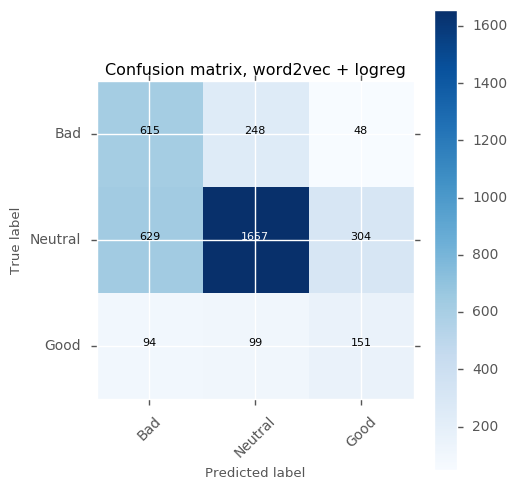

In [54]:
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 8})
class_names = ['Bad', 'Neutral', 'Good']
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, word2vec + logreg')
plt.show()

In [37]:
print ('f_score: {:.4f}'.format(my_score.f_macro(my_score.cound_diff(y_predict, y_test))))
print ('precision: {:.4f}'.format(precision_score(y_pred=y_predict, y_true=y_test, average='macro')))
print ('recall: {:.4f}'.format(recall_score(y_pred=y_predict, y_true=y_test, average='macro')))

f_score: 0.5867
precision: 0.5289
recall: 0.5846


In [136]:
max_n = min([y_train.value_counts().get(1), y_train.value_counts().get(-1), y_train.value_counts().get(0)])
X_bad = shuffle(X_train[np.array(y_train == -1),:])[:max_n]
X_neutral = shuffle(X_train[np.array(y_train == 0),:])[:max_n]
X_good = shuffle(X_train[np.array(y_train == 1),:])[:max_n]
X_train = np.append(X_bad, X_neutral, axis=0)
y_train = np.append(np.full(max_n, -1, dtype=int), np.full(max_n, 0, dtype=int))
X_train = np.append(X_train, X_good, axis=0)
y_train = np.append(y_train, np.full(max_n, 1, dtype=int))

array([-1,  1,  1, ...,  0,  0,  0])